In [ ]:
# 1 : DATA GENERATION

In [ ]:
import utils as tools
import pandas as pd
dates =tools.generate_month_for_year('2024-01-01','2024-12-01')

sales_A = tools.generate_random_seles(50, 100, len(dates))
sales_B = tools.generate_random_seles(30, 80, len(dates))
sales_C = tools.generate_random_seles(20, 60, len(dates))
sales_D = tools.generate_random_seles(10, 50, len(dates))


data_frame = pd.DataFrame({
    'Date': dates,
    'Product_A': sales_A,
    'Product_B': sales_B,
    'Product_C': sales_C,
    'Product_D': sales_D
})
data_frame.to_csv('data/initial.csv', index=False)

In [ ]:
# 2 : BUILD DATAFRAME

In [ ]:
data_frame2 = pd.DataFrame({
    'month': dates,
    'Product_A': sales_A,
    'Product_B': sales_B,
    'Product_C': sales_C,
    'Product_D': sales_D
})

total_sales = data_frame2[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)
average_sales = data_frame2[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)
Month_over_Month_growth = total_sales.pct_change().fillna(0) * 100

print("=== Average Sales Per Month ===")
print(average_sales)

print("\n=== Month-over-Month Growth (%) ===")
print(Month_over_Month_growth)

data_frame2['month']=pd.to_datetime(data_frame2['month'])
quarters = data_frame2['month'].dt.to_period('Q').astype(str)


def calculate_max_min_sales_product(row):
    products = ['Product_A', 'Product_B', 'Product_C', 'Product_D']
    max_product = row[products].idxmax()
    min_product = row[products].idxmin()
    return pd.Series([max_product, min_product])

data_frame2[['Max_Selling_Product', 'Min_Selling_Product']] = data_frame2.apply(calculate_max_min_sales_product, axis=1)

data_frame2.to_csv('data/final.csv', index=False)

In [ ]:
# 3 : PIVOT TABLES AND SUMMARIES

In [ ]:
average_sales_per_quarter_for_each_product = data_frame2.pivot_table(
    index=quarters,
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D'],
    aggfunc='mean'
).round(2)

data_frame2['Total_Sales'] = total_sales

average_total_sales_per_quarter = data_frame2.pivot_table(
    index=quarters,
    values=['Total_Sales'],
    aggfunc='mean'
).round(2)

total_sales_per_quarter= data_frame2.pivot_table(
    index=quarters,
    values=['Total_Sales'],
    aggfunc='sum'
).round(2)

data_frame3 = pd.DataFrame({
    'Quarter': quarters.unique(),
    'average_sales_per_quarter_for_each_product': average_sales_per_quarter_for_each_product.values.tolist(),
    'total_sales_per_quarter': total_sales_per_quarter.values.tolist(),
    'average_total_sales_per_quarter': average_total_sales_per_quarter.values.tolist(),
})

data_frame3.to_csv('data/output.csv', index=False)

In [ ]:
# 4 : key insights 

In [ ]:
best_month= data_frame2.loc[data_frame2['Total_Sales'].idxmax()]['month']
best_product= data_frame2[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum().idxmax()
best_quarter= total_sales_per_quarter['Total_Sales'].idxmax()

In [ ]:
# 5 : visualizations 

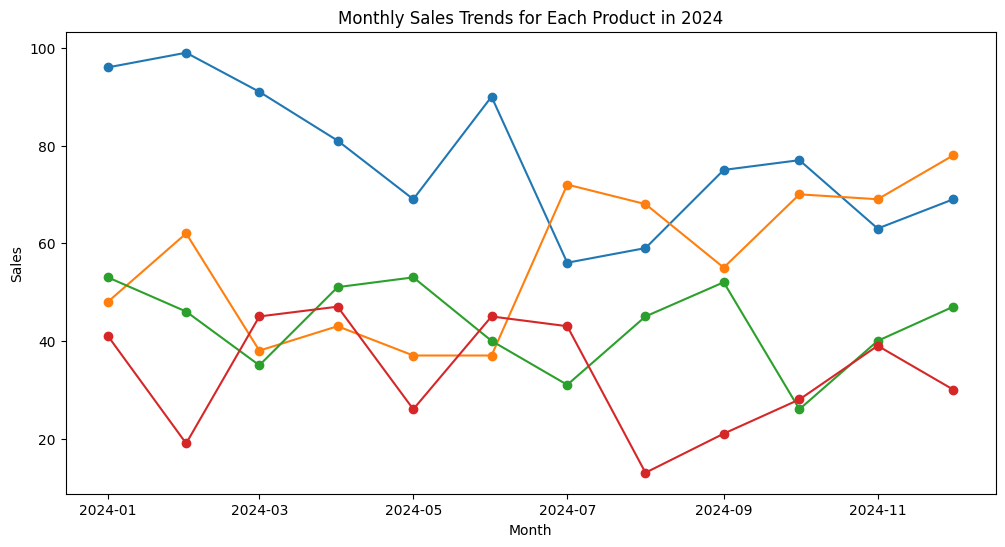

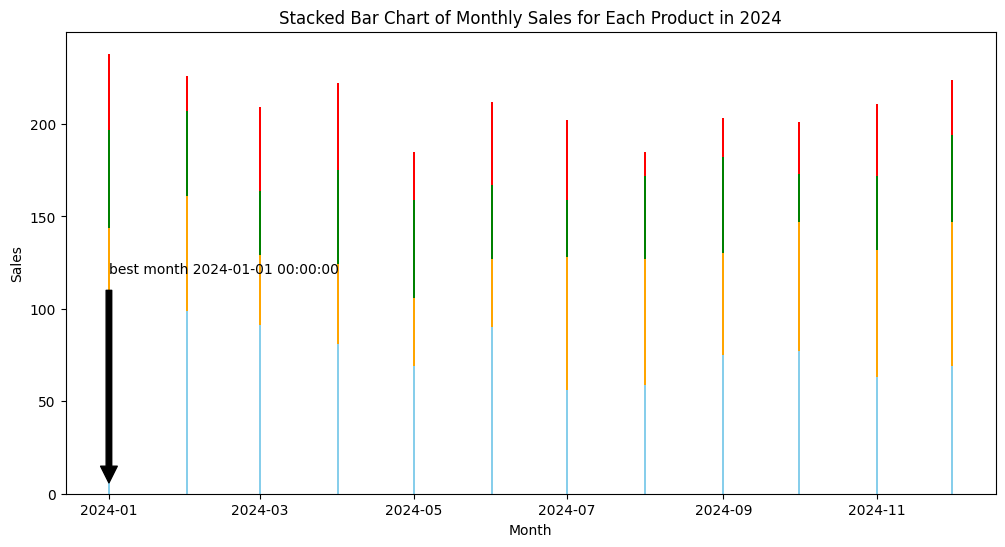

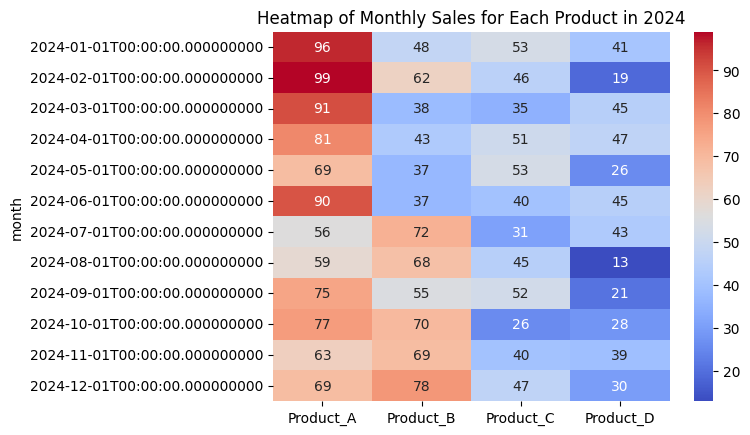

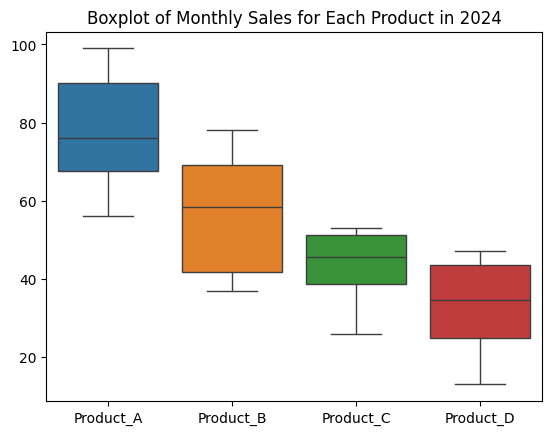

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(data_frame2['month'], data_frame2['Product_A'], marker='o', label='Product A')
plt.plot(data_frame2['month'], data_frame2['Product_B'], marker='o', label='Product B')
plt.plot(data_frame2['month'], data_frame2['Product_C'], marker='o', label='Product C')
plt.plot(data_frame2['month'], data_frame2['Product_D'], marker='o', label='Product D')
plt.title('Monthly Sales Trends for Each Product in 2024')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(data_frame2['month'], data_frame2['Product_A'], color='skyblue', label='Product A')
plt.bar(data_frame2['month'], data_frame2['Product_B'], bottom=data_frame2['Product_A'], color='orange', label='Product B')
plt.bar(data_frame2['month'], data_frame2['Product_C'], bottom=data_frame2['Product_A'] + data_frame2['Product_B'], color='green', label='Product C')
plt.bar(data_frame2['month'], data_frame2['Product_D'], bottom=data_frame2['Product_A'] + data_frame2['Product_B'] + data_frame2['Product_C'], color='red', label='Product D')
plt.title('Stacked Bar Chart of Monthly Sales for Each Product in 2024')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.annotate(f"best month {best_month}",xy=(best_month,0), xytext=(best_month, max(total_sales)/2),
             arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

sns.heatmap(data_frame2.set_index('month')[['Product_A', 'Product_B', 'Product_C', 'Product_D']], annot=True, cmap='coolwarm')
plt.title('Heatmap of Monthly Sales for Each Product in 2024')
plt.show()
sns.boxplot(data=data_frame2[['Product_A','Product_B','Product_C','Product_D']])
plt.title('Boxplot of Monthly Sales for Each Product in 2024')
plt.show()

In [ ]:
# 6 : conclusion questions

In [ ]:
print(f"The product that contributed the most sales was {best_product}.")
print(f"the best quarter was {best_quarter}. because it had the highest total sales.")
print(f"These insights allow the sales team to concentrate their marketing and inventory strategies on top-selling products during peak quarters, improving revenue generation and operational efficiency.")

The product that contributed the most sales was Product_A.
the best quarter was 2024Q1. because it had the highest total sales.
this information can help the sales team focus their efforts on promoting the best-selling products during the most profitable quarters to maximize revenue.
